###### Assessment

###### I am going to provide two .csv files , you are supposed to work on them and have to provide solutions to the following problems

###### import necessary libraries

In [1]:
import pandas as pd
import math 
import numpy as np
import os
import matplotlib.pyplot as plt

###### merge those two csv files (after getting as dataframes, get them as a single dataframe)

In [45]:

df_1= pd.read_csv("college_1.csv")
df_2= pd.read_csv("college_2.csv")

df_1=pd.DataFrame(df_1)
df_2=pd.DataFrame(df_2)

'''
df_1.info()
df_2.info()
df_1.describe()
df_2.describe() 
'''

#concatenated = pd.concat([df_1, df_2])
#concatenated.info()

concatenated=pd.merge(df_1,df_2,how='outer')
concatenated.reset_index(drop=True, inplace=True)
concatenated


c:\users\elasubra\pycharmprojects\python_ds_proj\venv\lib\site-packages\pandas\core\reshape\merge.py:1205: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  warnings.warn(


,Name,python,mysql,Previous Geekions,CodeKata Score,Department,Rising,python_en,computational_thinking
0,A.Dharani,82.0,20.0,24500,24500,Computer Science and Engineering,0,NaN,NaN
1,V.JEEVITHA,82.0,20.0,21740,21740,Computer Science and Engineering,0,NaN,NaN
2,HEMAVATHI.R,100.0,100.0,19680,19680,Computer Science and Engineering,0,NaN,NaN
3,Mugunthan S,100.0,47.0,10610,10610,Computer Science and Engineering,0,NaN,NaN
4,Sathammai.S,100.0,8.0,8980,8980,Computer Science and Engineering,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
114,praveen raj j,24.0,0.0,2380,2380,Computer Science and Engineering,0,-1.0,0.0
115,AMARNATH D,-1.0,12.0,1890,1890,Electronics and Communication Engineering,0,52.0,-1.0
116,bala,32.0,0.0,1720,1720,Electronics and Communication Engineering,0,49.0,-1.0
117,XY Z,-1.0,-1.0,0,0,Computer Science and Engineering,0,20.0,-1.0


###### Take each csv file , split that csv file into multiple categories (example csv files are added in the repo) 


###### consider if the codekata score exceeds 15000 points(present week) then make a csv on those observations as Exceeded expectations.csv


###### if  10000<codekata score<15000   (Reached_expectations.csv)



###### if  7000<codekata score<10000   (Needs_Improvement.csv)


###### if  codekate score < 7000        (Unsatisfactory.csv)

In [46]:
#Exceeded expectations
exceedExp= concatenated['CodeKata Score']>15000
concatenated[exceedExp].to_csv('Exceeded_expectations.csv')

#Reached_expectations
reachedExp= (10000<concatenated['CodeKata Score']) & (concatenated['CodeKata Score']<15000)
concatenated[reachedExp].to_csv('Reached_expectations.csv')


In [47]:
#Needs_Improvement
needImp=(7000<concatenated['CodeKata Score']) & (concatenated['CodeKata Score']<10000)
concatenated[needImp].to_csv('Needs_Improvement.csv')

#Unsatisfactory
Unsatis= concatenated['CodeKata Score']<7000
concatenated[Unsatis].to_csv('Unsatisfactory.csv')

###### Average of previous week geekions vs this week geekions (i.e Previous Geekions vs CodeKata Score)

In [48]:
#Average of previous week geekions
concatenated['Previous Geekions'].mean()

#Average of this week geekions
concatenated['CodeKata Score'].mean()


4051.764705882353

###### No of students participated 

In [49]:
#concatenated.groupby('Name')['Name'].count()
#print(concatenated)
concatenated['Name'].count()

119

###### #Average completion of python course or my_sql or python english or computational thinking

In [52]:
[concatenated['python'].mean(),
concatenated['mysql'].mean(),
concatenated['python_en'].mean(),
concatenated['computational_thinking'].mean()]

# [54.35294117647059, 23.5, 29.65714285714286, 2.2]

[54.35294117647059, 23.5, 29.65714285714286, 2.2]

###### rising star of the week (top 3 candidate who performed well in that particular week)

In [53]:
concatenated.sort_values("Rising", axis = 0, ascending = False).head(3)

,Name,python,mysql,Previous Geekions,CodeKata Score,Department,Rising,python_en,computational_thinking
92,shifak N,58.0,0.0,5180,8320,Electronics and Electrical Engineering,3140,0.0,0.0
102,Narasimhan Y L,-1.0,0.0,4800,6800,Computer Science and Engineering,2000,-1.0,0.0
86,Ganesh Ramkumar R,-1.0,24.0,8790,10790,Computer Science and Engineering,2000,55.0,6.0


###### Shining stars of the week (top 3 candidates who has highest geekions)

In [54]:
#top 3 Shining stars of the week
concatenated.sort_values("Previous Geekions", axis = 0, ascending = False).head(3)

,Name,python,mysql,Previous Geekions,CodeKata Score,Department,Rising,python_en,computational_thinking
0,A.Dharani,82.0,20.0,24500,24500,Computer Science and Engineering,0,NaN,NaN
1,V.JEEVITHA,82.0,20.0,21740,21740,Computer Science and Engineering,0,NaN,NaN
2,HEMAVATHI.R,100.0,100.0,19680,19680,Computer Science and Engineering,0,NaN,NaN


###### Department wise codekata performence (pie chart)

'\ndept_details = concatenated[["Department","CodeKata Score"]]\n\nplt.pie(dept_details["CodeKata Score"], labels = dept_details["Department"])\nplt.show() \n#print(dept_details)\npie_source = dept_details.groupby(\'Department\')[\'CodeKata Score\'].max()\npie_source\n'

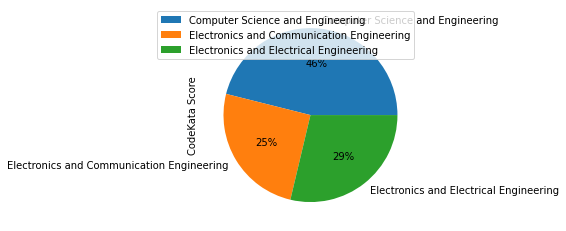

In [55]:
dept=concatenated.pivot_table(index = 'Department', values='CodeKata Score')
dept.plot(kind='pie',y='CodeKata Score',autopct='%1.0f%%')

#dept_name = concatenated['Department'].values()
#dept_score = concatenated['CodeKata Score'].values()
'''
dept_details = concatenated[["Department","CodeKata Score"]]

plt.pie(dept_details["CodeKata Score"], labels = dept_details["Department"])
plt.show() 
#print(dept_details)
pie_source = dept_details.groupby('Department')['CodeKata Score'].max()
pie_source
'''

###### Department wise toppers (horizantal bar graph or any visual representations of your choice)

In [31]:
#cse topper
cs=(college['Department']=='Computer Science and Engineering')
cse= college[cs]

cse1= cse.sort_values(['Previous Geekions','python','mysql','CodeKata Score','computational_thinking'], ascending = False).head(1)

In [15]:
#ece topper
ec=(college['Department']=='Electronics and Communication Engineering')
ece= college[ec]

ece1= ece.sort_values(['Previous Geekions','python','mysql','CodeKata Score','computational_thinking'], ascending = False).head(1)

In [24]:
#eee topper
ee=(college['Department']=='Electronics and Electrical Engineering')
eee= college[ee]

eee1= eee.sort_values(['Previous Geekions','python','mysql','CodeKata Score','computational_thinking'], ascending = False).head(1)

<AxesSubplot:title={'center':'Department wise toppers'}, ylabel='Name'>

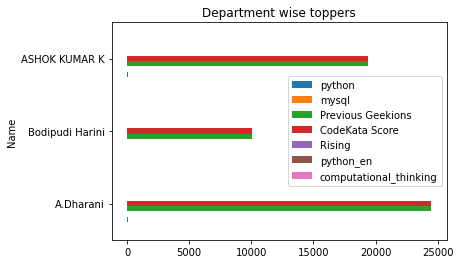

In [68]:

#combining three department topper data
frames=[cse1,ece1,eee1]
topperList= pd.concat(frames)
#plotting them on chart
topperList.plot.barh(x='Name',title='Department wise toppers')

#concatenated['Department'].unique()
'''
dept_details = college[["Department","CodeKata Score"]]
a = dept_details.groupby('Department')['CodeKata Score'].max()
a = a.to_frame()
a.rename(columns={'CodeKata Score': 'CodeKata_Score'}, inplace=True)
new = pd.DataFrame([a.index, a.CodeKata_Score ]).transpose()
'''
